<font size=6><b>Lec06.LSTM을 활용한 주가 예측

# 주가 데이터 가져오기

## 야후 파이넨셜(Yahoo! Finance's API)
* ref : https://pypi.org/project/yfinance/

In [1]:
# ! pip install yfinance 

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.297695  206.147537  29.037500  225.240005  29.082500   
2017-01-04  27.267138  207.373962  29.004999  226.580002  29.127501   
2017-01-05  27.405804  207.209229  29.152500  226.399994  29.215000   
2017-01-06  27.711330  207.950562  29.477501  227.210007  29.540001   
2017-01-09  27.965149  207.264145  29.747499  226.460007  29.857500   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   
2017-01-06  227.750000  29.117500  225.899994  29.195000  226.529999   
2017-01-09  227.070007  29.485001  226.419998  29.487499  226.910004   

               Volume            
                 AAPL       SPY  
Date                             
2017-01-03  115127600  91366500  
2017-01-04   84472400  78744400  
2017-01-05   88774400  78379000  
2017-01-06  127007600  71559900  
2017-01-09  134247600  46939700

## pandas-datareader
* ref : https://pandas-datareader.readthedocs.io/en/latest/

In [3]:
# ! pip install pandas-datareader

In [4]:
# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,206.147552,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,207.373947,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,207.209213,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,207.950546,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,207.264145,46939700


## FinanceDatareader
* ref : https://github.com/FinanceData/FinanceDataReader

In [5]:
# ! pip install finance-datareader

In [6]:
import FinanceDataReader as fdr

# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
dfss = fdr.DataReader('005930') #,'1980-01-01', '2019-12-30'
print(dfss.shape)
dfss.head()

(6000, 6)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-21,1388,1388,1283,1320,1163080,NaN
1998-01-22,1307,1325,1214,1215,905730,-0.079545
1998-01-23,1234,1263,1200,1262,616720,0.038683
1998-01-24,1288,1361,1270,1362,467950,0.079239
1998-01-26,1377,1468,1377,1461,1244670,0.072687


In [7]:
stocks = fdr.StockListing('KOSDAQ') 
stocks.head(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도


In [8]:
# 캔들차트 그리기
df = fdr.DataReader('005930', '2021-01-01', '2021-02-15')

# 차트 설정
config = {'title':'삼성', 
          'width': 600, 
          'height': 300,
          'volume': True,
}
fdr.chart.config(config=config)
fdr.chart.plot(df)

Loading BokehJS ...

## PyKRX
* ref : https://github.com/sharebook-kr/pykrx

In [9]:
# ! pip install pykrx

In [10]:
from pykrx import stock
from pykrx import bond

df = stock.get_market_ohlcv("20150720", "20150810", "005930")
df.head(3)

,시가,고가,저가,종가,거래량
날짜,,,,,
2015-07-20,25820,26080,25460,25500,128928
2015-07-21,25500,25540,24940,25260,194055
2015-07-22,24880,25200,24700,25060,268323


In [11]:
tickers = stock.get_market_ticker_list()
tickers[:5]

['095570', '006840', '027410', '282330', '138930']

# 삼성 약 28년 주가 정보 가져오기 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

In [13]:
# import FinanceDataReader as fdr

# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
dfss = fdr.DataReader('005930') #,'1980-01-01', '2019-12-30'
print(dfss.shape)
dfss.head()

(6000, 6)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-21,1388,1388,1283,1320,1163080,NaN
1998-01-22,1307,1325,1214,1215,905730,-0.079545
1998-01-23,1234,1263,1200,1262,616720,0.038683
1998-01-24,1288,1361,1270,1362,467950,0.079239
1998-01-26,1377,1468,1377,1461,1244670,0.072687


In [1]:
dfss = dfss.loc['2013-01-01':'2022-03-01'].copy()  #2015년도 데이터는 ma60을 위한 패딩 데이터

NameError: name 'dfss' is not defined

In [15]:
dfss.shape

(986, 6)

<AxesSubplot:xlabel='Date'>

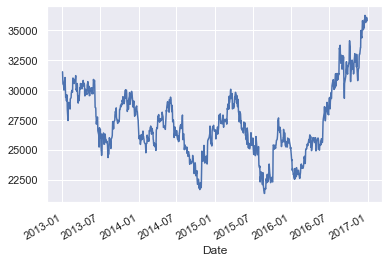

In [16]:
dfss['Close'].plot()

# 전처리  & 가공

## MinMaxScaler()

In [17]:
# from sklearn.preprocessing import MinMaxScaler

In [18]:
dfss['Close'].values[:5]

array([31520, 30860, 30500, 30400, 30000], dtype=int64)

* 연습

In [19]:
scaler1 = MinMaxScaler()
y_scaler = scaler1.fit_transform(dfss['Close'].values.reshape(-1,1))  # 세로줄 array
print(y_scaler[:5])

[[0.68322148]
 [0.63892617]
 [0.6147651 ]
 [0.60805369]
 [0.58120805]]


In [20]:
scaler2 = MinMaxScaler()
col_list = ['Open', 'High', 'Low',  'Volume', 'Change']

X_scaler = scaler2.fit_transform(dfss[col_list])  # 세로줄 array
print(X_scaler[:5])  #array 2D

dfss = pd.DataFrame(data=X_scaler, columns=col_list, index=dfss.index)
dfss['Close'] = y_scaler.reshape(-1,1)
dfss.head()

[[0.62       0.66395503 0.64322917 0.13784676 0.69264578]
 [0.68533333 0.67460317 0.6640625  0.18482841 0.35529016]
 [0.62933333 0.61904762 0.62102865 0.16388661 0.41074103]
 [0.596      0.6005291  0.60800781 0.15739986 0.46089047]
 [0.59333333 0.58597884 0.60546875 0.17793138 0.40181778]]


,Open,High,Low,Volume,Change,Close
Date,,,,,,
2013-01-02,0.620000,0.663955,0.643229,0.137847,0.692646,0.683221
2013-01-03,0.685333,0.674603,0.664063,0.184828,0.355290,0.638926
2013-01-04,0.629333,0.619048,0.621029,0.163887,0.410741,0.614765
2013-01-07,0.596000,0.600529,0.608008,0.157400,0.460890,0.608054
2013-01-08,0.593333,0.585979,0.605469,0.177931,0.401818,0.581208


## 이평 파생변수

In [21]:
dfss['ma5'] = dfss['Close'].rolling(5).mean()
dfss['ma20'] = dfss['Close'].rolling(20).mean()
dfss['ma60'] = dfss['Close'].rolling(60).mean()
dfss.head()    
    

,Open,High,Low,Volume,Change,Close,ma5,ma20,ma60
Date,,,,,,,,,
2013-01-02,0.620000,0.663955,0.643229,0.137847,0.692646,0.683221,NaN,NaN,NaN
2013-01-03,0.685333,0.674603,0.664063,0.184828,0.355290,0.638926,NaN,NaN,NaN
2013-01-04,0.629333,0.619048,0.621029,0.163887,0.410741,0.614765,NaN,NaN,NaN
2013-01-07,0.596000,0.600529,0.608008,0.157400,0.460890,0.608054,NaN,NaN,NaN
2013-01-08,0.593333,0.585979,0.605469,0.177931,0.401818,0.581208,0.625235,NaN,NaN


In [22]:
dfss = dfss.dropna(axis=0)

In [23]:
dfss.isna().sum()

Open      0
High      0
Low       0
Volume    0
Change    0
Close     0
ma5       0
ma20      0
ma60      0
dtype: int64

In [24]:
dfss.head()

,Open,High,Low,Volume,Change,Close,ma5,ma20,ma60
Date,,,,,,,,,
2013-03-28,0.579933,0.576720,0.604167,0.079191,0.504350,0.594631,0.573960,0.584631,0.569687
2013-03-29,0.608000,0.605820,0.630208,0.105261,0.547814,0.617450,0.593289,0.583490,0.568591
2013-04-01,0.622667,0.609788,0.623633,0.033704,0.421758,0.597315,0.597852,0.581678,0.567897
2013-04-02,0.589267,0.605820,0.621029,0.089072,0.531906,0.614765,0.602148,0.580000,0.567897
2013-04-03,0.610600,0.600529,0.619792,0.128037,0.464811,0.609396,0.606711,0.577383,0.567919


## 슬라이딩 데이터 생성(window_size )

In [25]:
dfss.shape

(927, 9)

In [26]:
dfss.isna().sum()

Open      0
High      0
Low       0
Volume    0
Change    0
Close     0
ma5       0
ma20      0
ma60      0
dtype: int64

In [27]:
dfss[dfss['Change'].isna()]

,Open,High,Low,Volume,Change,Close,ma5,ma20,ma60
Date,,,,,,,,,


In [28]:
dfss = dfss.fillna(method='bfill') #---------- 이전레코드값을 채워라
dfss = dfss.fillna(method='ffill') #---------- 다음레코드값을 채워라

In [29]:
dfss.head(3)

,Open,High,Low,Volume,Change,Close,ma5,ma20,ma60
Date,,,,,,,,,
2013-03-28,0.579933,0.576720,0.604167,0.079191,0.504350,0.594631,0.573960,0.584631,0.569687
2013-03-29,0.608000,0.605820,0.630208,0.105261,0.547814,0.617450,0.593289,0.583490,0.568591
2013-04-01,0.622667,0.609788,0.623633,0.033704,0.421758,0.597315,0.597852,0.581678,0.567897


## 테스트 데이터 셋 분리

In [ ]:
window_size = 20
test_size = 100

In [ ]:
train = dfss.iloc[:-test_size ,  : ]
test  = dfss.iloc[-test_size: ,  : ]
train.shape, test.shape

NameError: name 'dfss' is not defined

* 연습용

In [32]:
# traincp = train.iloc[:30, :].copy()
# X_list = []
# y_list = []
# for i in range(len(traincp) - window_size):
#     X_train = traincp.iloc[i: window_size+i , :]
#     y_train = traincp.iloc[window_size+i , :]
#     X_list.append(np.array(X_train))      #[[] ,[] ,[] ,[]]
#     y_list.append(np.array(y_train))
#     X_arr = np.array(X_list)
#     y_arr = np.array(y_list)
#     #print(X_train.shape, y_train.shape)
# print(X_arr.shape, y_arr.shape)    
    

In [33]:
dfss.columns

Index(['Open', 'High', 'Low', 'Volume', 'Change', 'Close', 'ma5', 'ma20',
       'ma60'],
      dtype='object')

In [34]:
def my_window_data(df_X, df_y,  window_size=20):
    X_list = []
    y_list = []
    for i in range(len(df_X) - window_size):
        X_list.append(df_X.iloc[i: window_size+i , :])      #[[] ,[] ,[] ,[]]
        y_list.append(df_y.iloc[window_size+i , :])
    return np.array(X_list), np.array(y_list)


In [35]:
X_col = ['Open', 'High', 'Low', 'Volume', 'Change'] #....mon rsi news
y_col = ['Close']
X_train, y_train = my_window_data(train[X_col], train[y_col], 20)
print(X_train.shape, y_train.shape)

X_test, y_test = my_window_data(test[X_col], test[y_col], 20)
print(X_test.shape, y_test.shape)

(807, 20, 5) (807, 1)
(80, 20, 5) (80, 1)


# LSTM 모델 

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM                 #RNN
# from keras.layers import Dense, Conv2D, MaxPool2D  #CNN
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [37]:
lstm = LSTM( units = 16,
             input_shape=(X_train.shape[1], X_train.shape[2]),  #(4980, 20, 5)  --> (20,5),    
             activation='tanh',
             recurrent_activation='sigmoid',
             dropout=0.0,
             recurrent_dropout=0.0,
             return_sequences=True
      )
model = Sequential()
model.add( lstm )                #256개 내보내기
model.add( LSTM( units = 10, return_sequences=True ) ) #128개 내보내기
model.add( LSTM( units = 8) )   #128개 내보내기
model.add( Dense(1) )

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 16)            1408      
                                                                 
 lstm_1 (LSTM)               (None, 20, 10)            1080      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 608       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 3,105
Trainable params: 3,105
Non-trainable params: 0
_________________________________________________________________


In [39]:
import os
import shutil

if os.path.exists("./models"):
    shutil.rmtree("./models") 

if not os.path.exists("./models"):
    os.mkdir('./models')  
# if not os.direxists('models') :
#     os.mkdir("models")    

In [40]:
model.compile(loss="mse", optimizer='adam')  #, metrics="mse")

stop = EarlyStopping(patience=10, monitor='val_loss')

check_point = ModelCheckpoint(filepath='./models/mymodel_{epoch:02d}_{val_loss:.4f}.h5',
                    monitor='val_loss',          #------------어떤 점수를 기준으로 모니터링할까
                    save_best_only=True,         #------------이전보다 좋아질때만 저장
                    save_weights_only=False      #------------모델+가중치 같이 저장
                   ) 
res = model.fit(X_train, y_train, 
          callbacks=[stop, check_point],
          epochs = 100,
          batch_size = 32,
          validation_split=0.2
         )

Epoch 1/100
21/21 [==============================] - 6s 71ms/step - loss: 0.0754 - val_loss: 0.0244
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0177 - val_loss: 0.0213
Epoch 3/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0135 - val_loss: 0.0152
Epoch 4/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 5/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0069 - val_loss: 0.0076
Epoch 6/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 7/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0086
Epoch 8/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 9/100
21/21 [==============================] - 0s 17ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 10/100
21/21 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0053

# 학습 평가 시각화

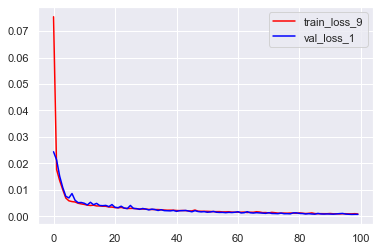

In [41]:
plt.plot(np.arange(len(res.history['val_loss'])), res.history['loss'], c='red', label='train_loss_9')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss_1')
plt.legend()
plt.show()


# 예측 

In [42]:
pred = model.predict(X_test)
print(pred.shape, y_test.shape)

(80, 1) (80, 1)


In [43]:
pred[:3], y_test[:3]

(array([[0.67474157],
        [0.6849286 ],
        [0.70396435]], dtype=float32),
 array([[0.72348993],
        [0.77315436],
        [0.74362416]]))

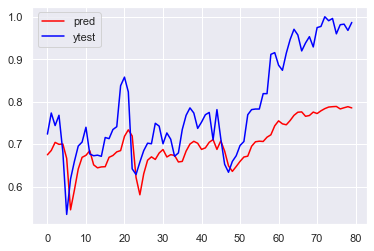

In [44]:
plt.plot(np.arange(pred.shape[0]), pred, c='red', label='pred')
plt.plot(np.arange(pred.shape[0]), y_test, c='blue', label='ytest')
plt.legend()
plt.show()


In [45]:
pred_orig   = scaler1.inverse_transform(pred)
y_test_orig   = scaler1.inverse_transform(y_test)
print(pred_orig[:5])

[[31393.648]
 [31545.438]
 [31829.07 ]
 [31760.174]
 [31773.088]]


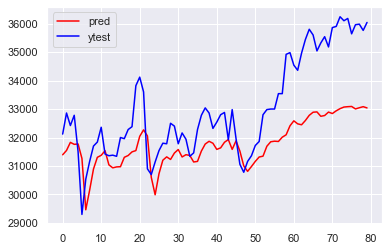

In [46]:
plt.plot(np.arange(pred_orig.shape[0]), pred_orig, c='red', label='pred')
plt.plot(np.arange(pred_orig.shape[0]), y_test_orig, c='blue', label='ytest')
plt.legend()
plt.show()


In [47]:
## 최종 답안지 ---- pred_orig